C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10292\2743197267.py:20: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  kategorical_features = train[less].select_dtypes(include=['object']).columns
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10292\2743197267.py:41: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pand

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

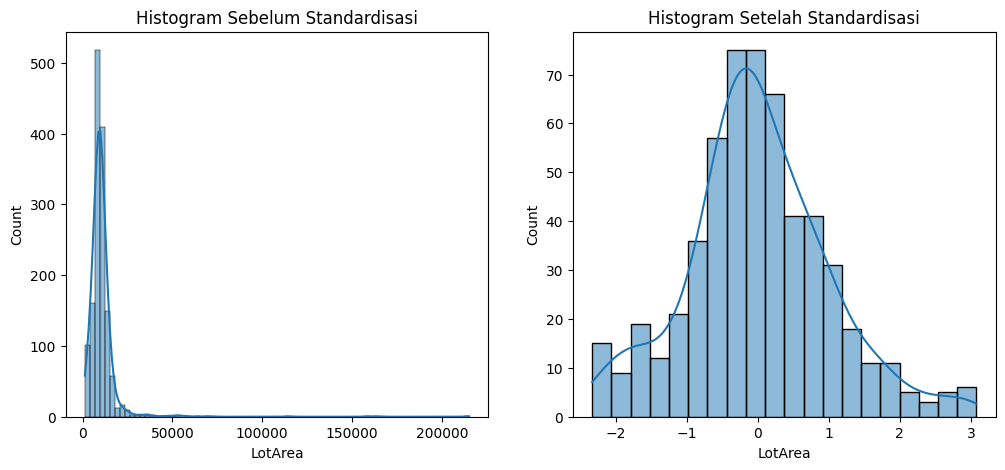

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Memeriksa jumlah nilai yang hilang di setiap kolom
train = pd.read_csv("content/train.csv")
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

missing_values = train.isnull().sum()
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Histogram Sebelum Standardisasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram Sebelum Standardisasi")

# Histogram Setelah Standardisasi
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10292\3875686787.py:20: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  kategorical_features = train[less].select_dtypes(include=['object']).columns
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_10292\3875686787.py:41: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pand

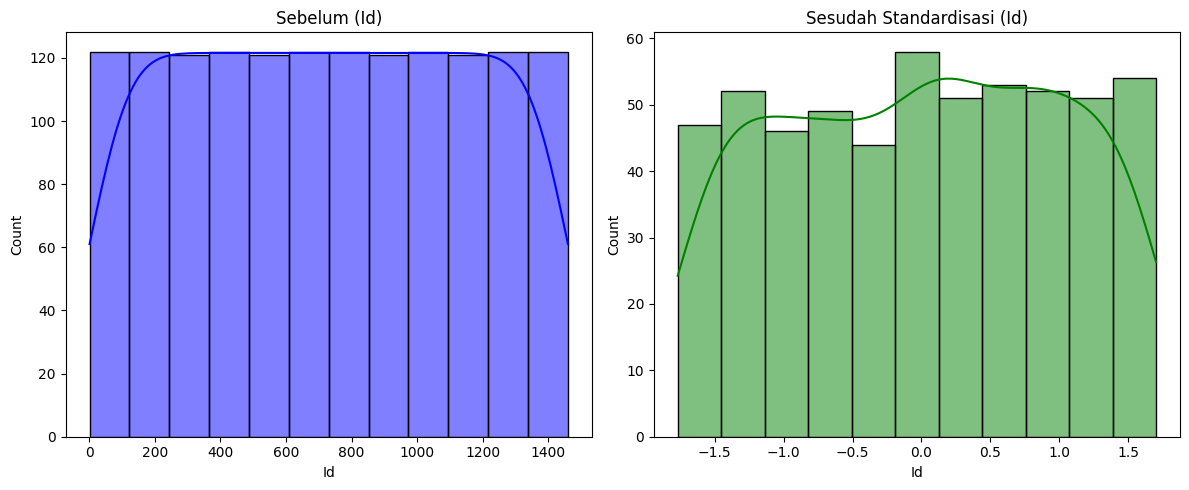

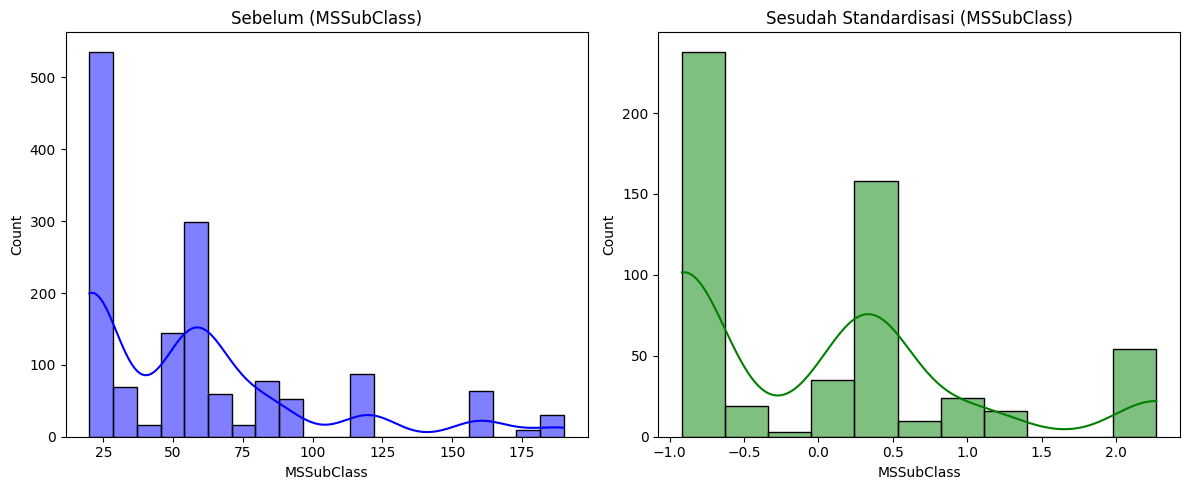

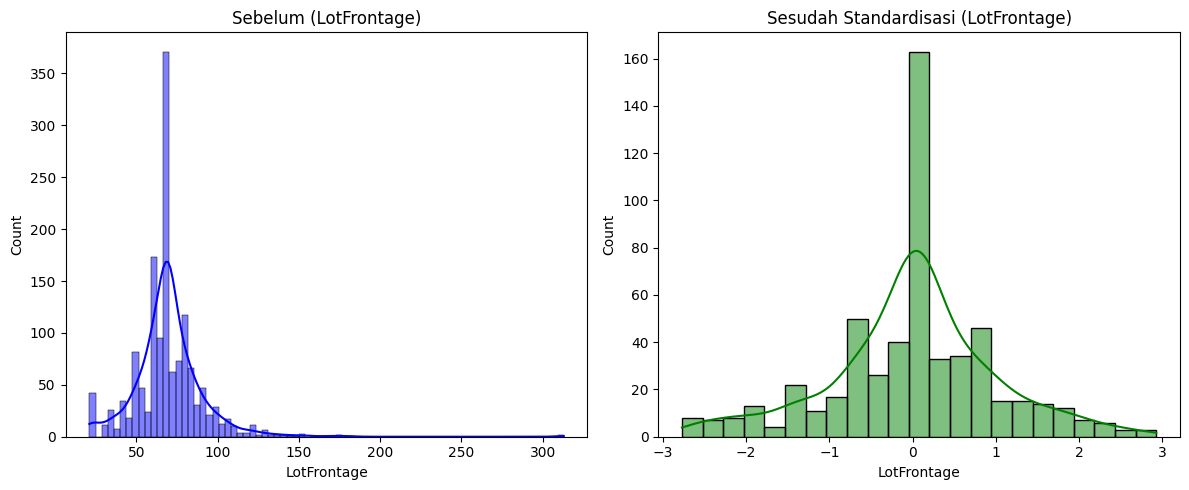

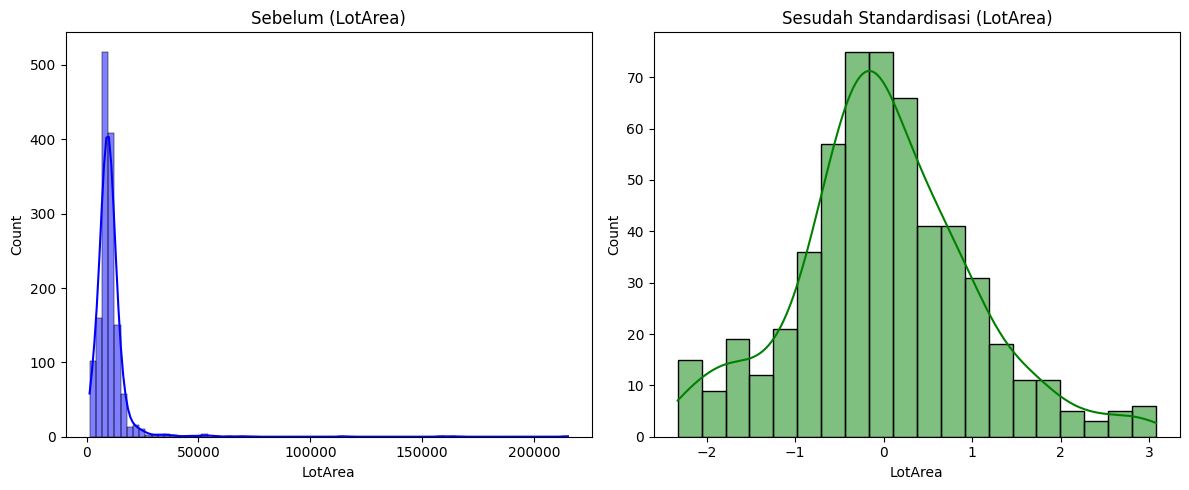

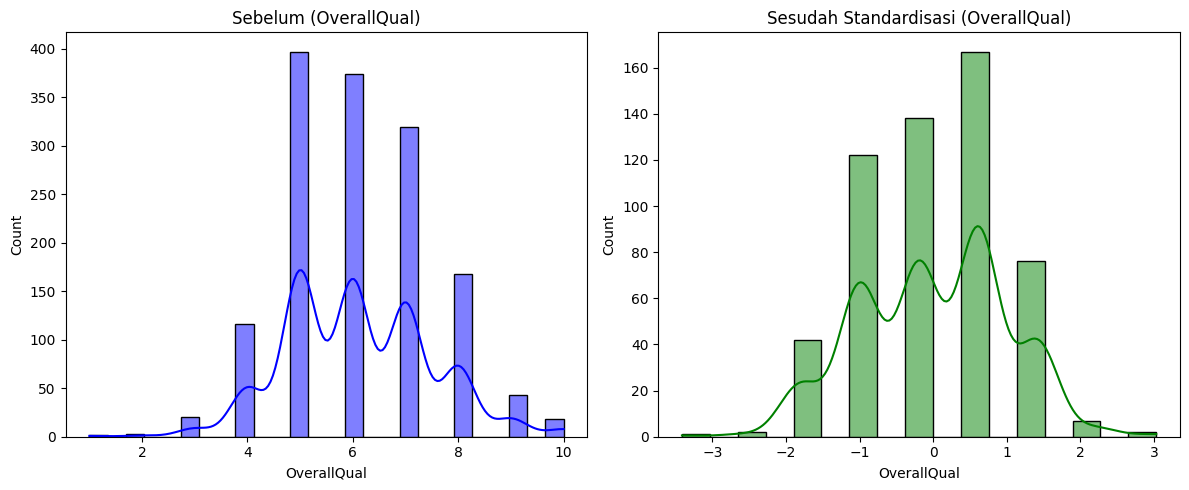

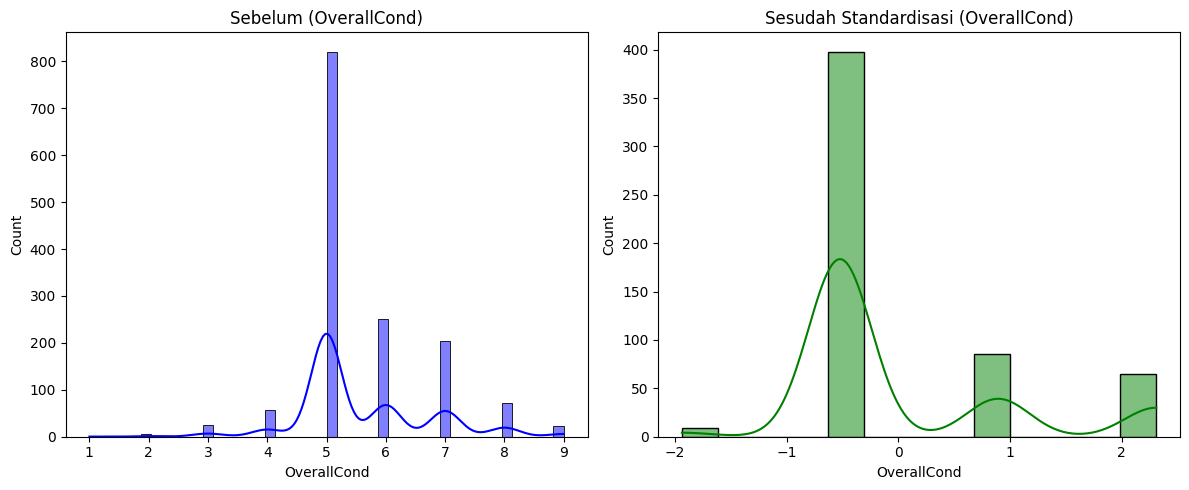

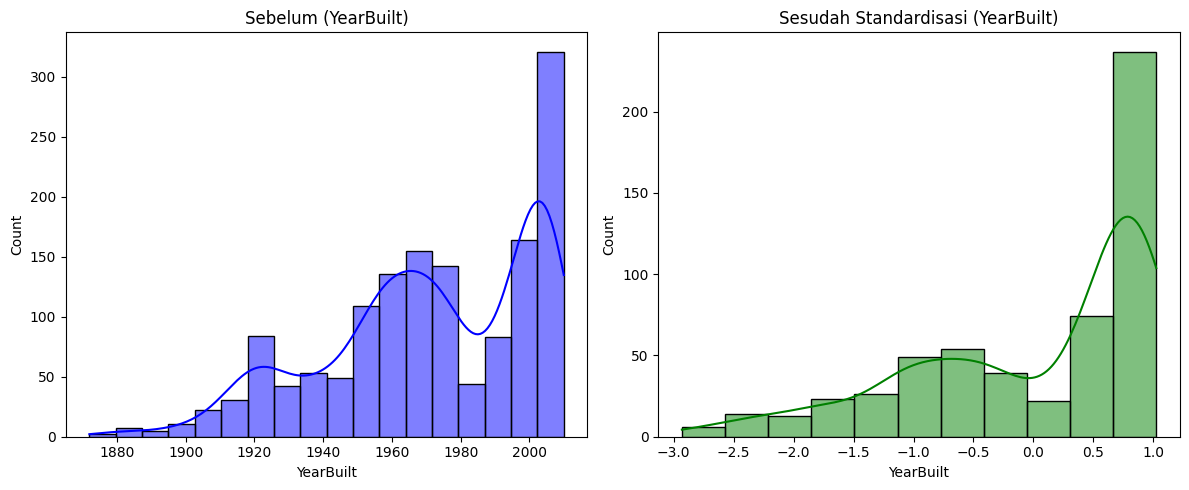

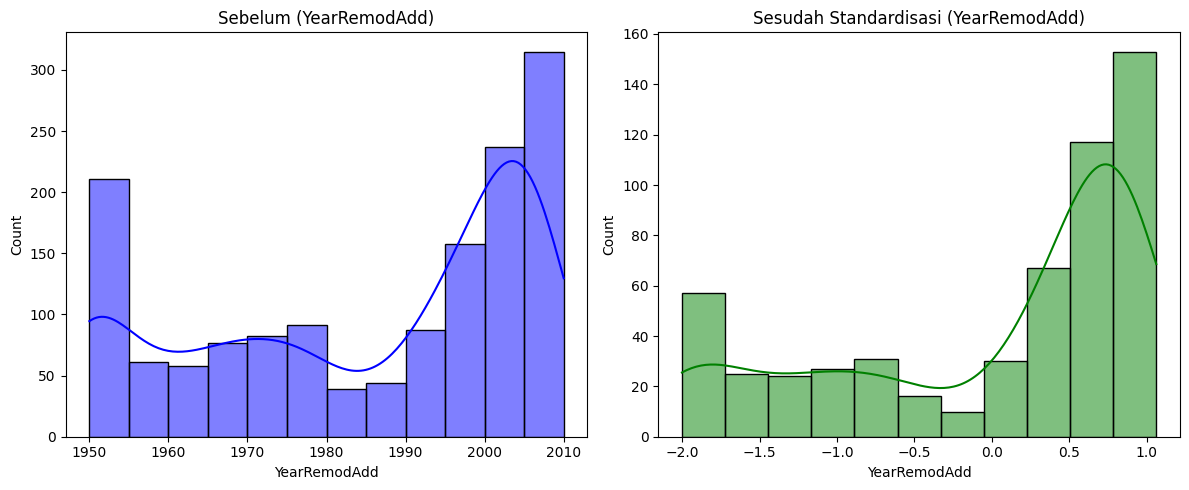

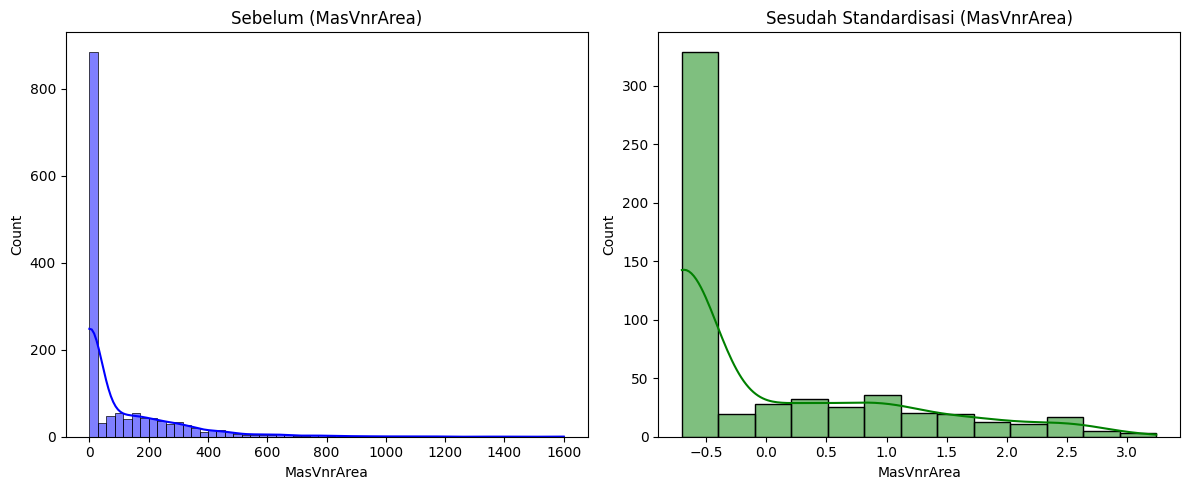

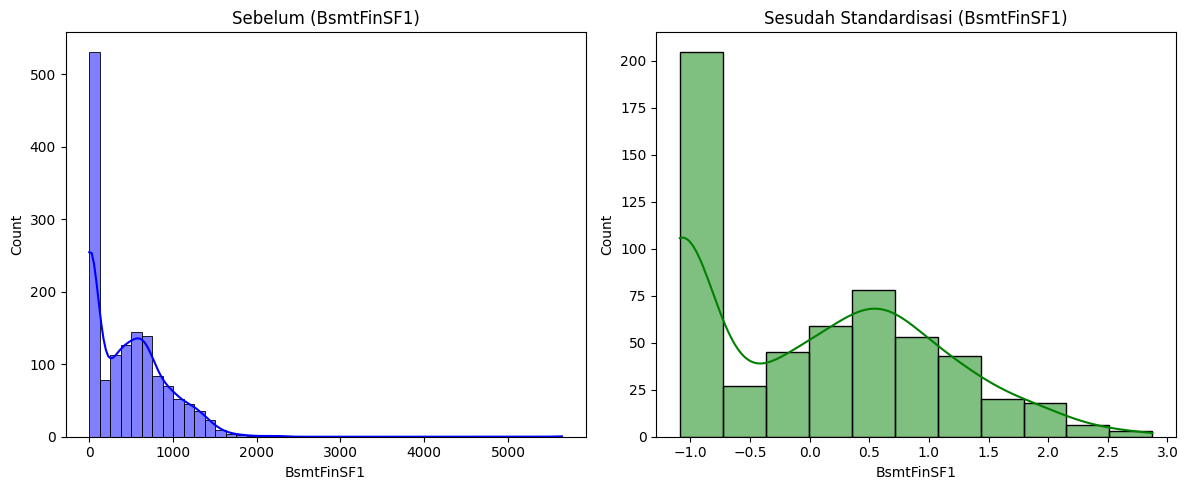

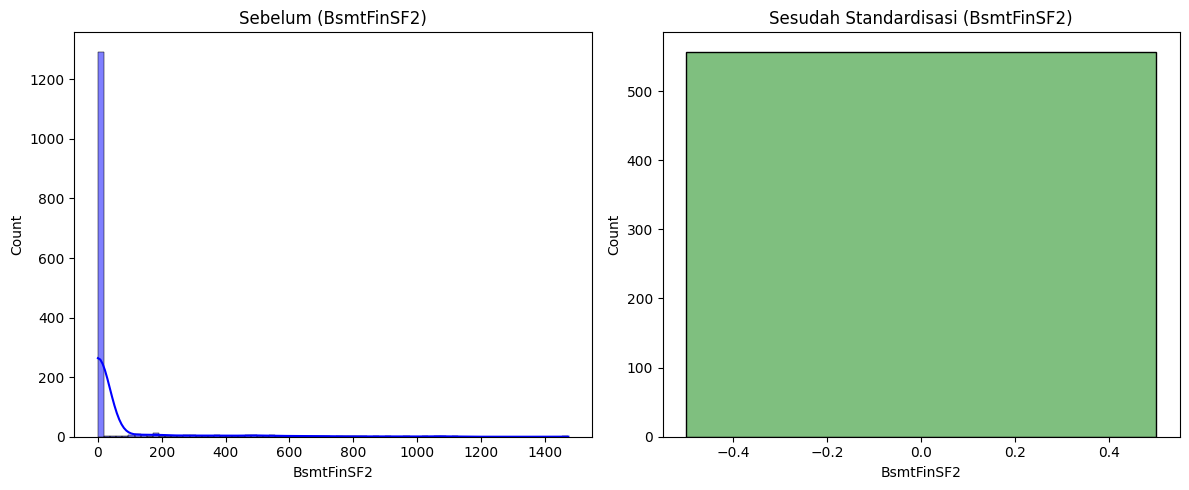

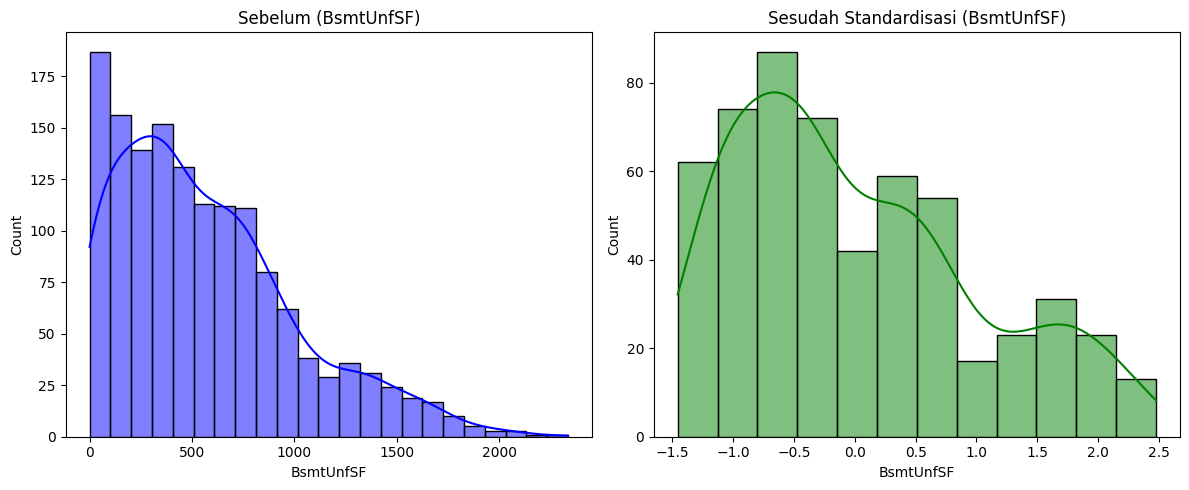

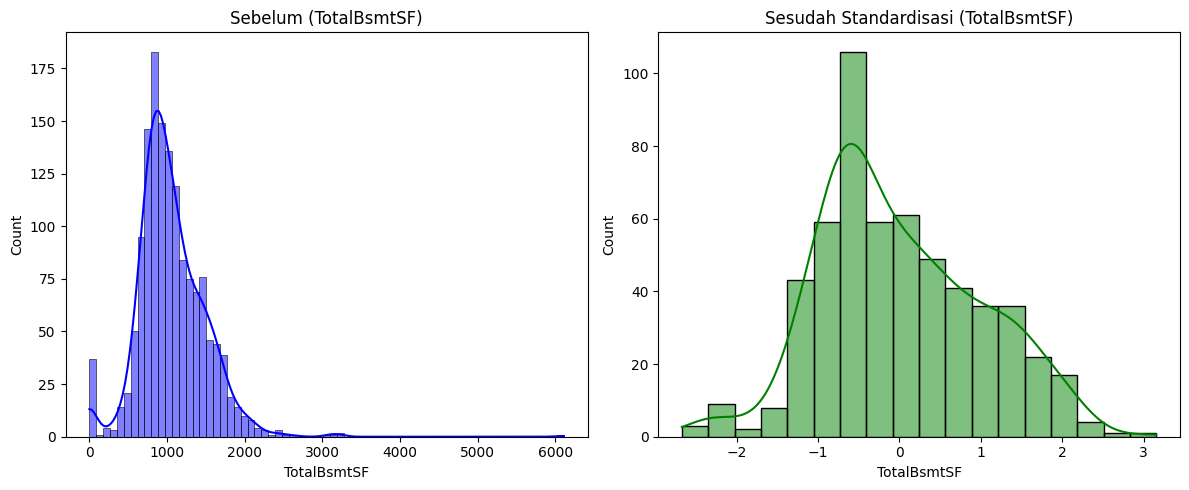

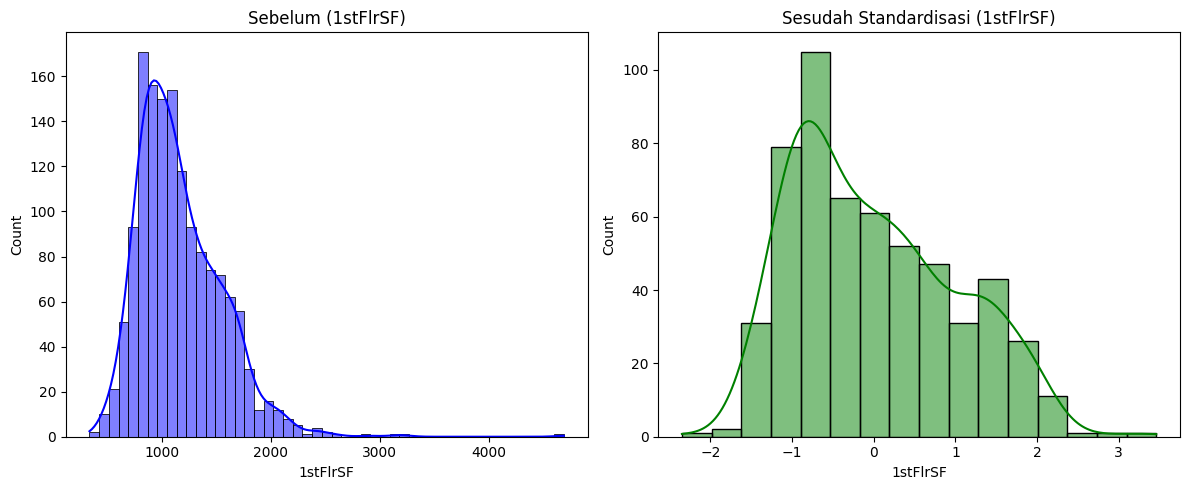

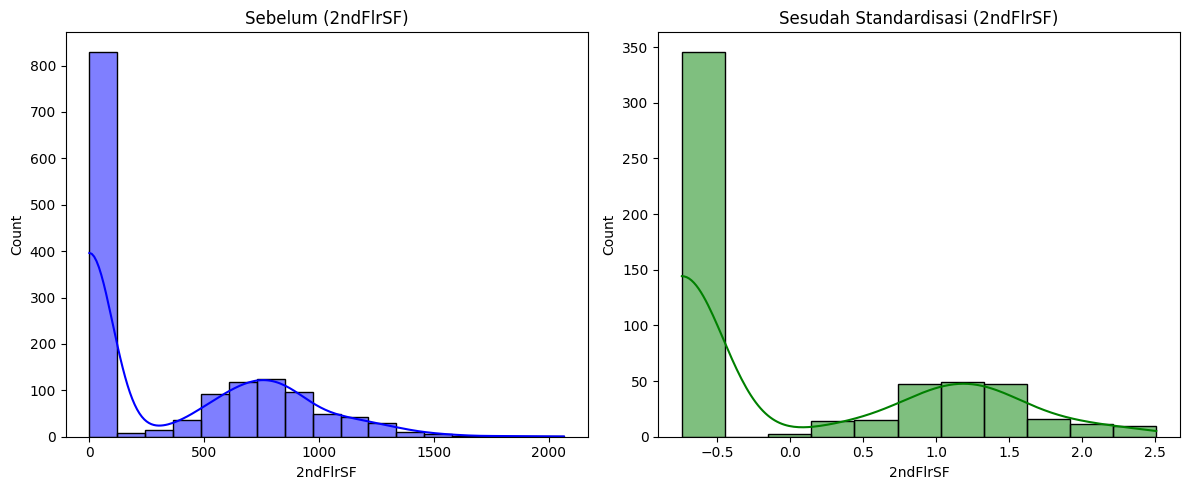

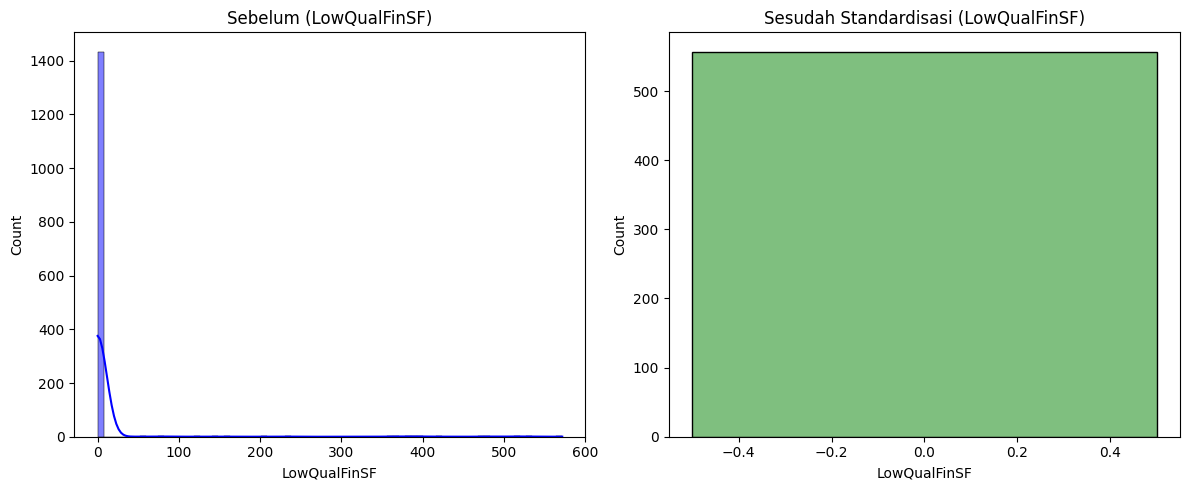

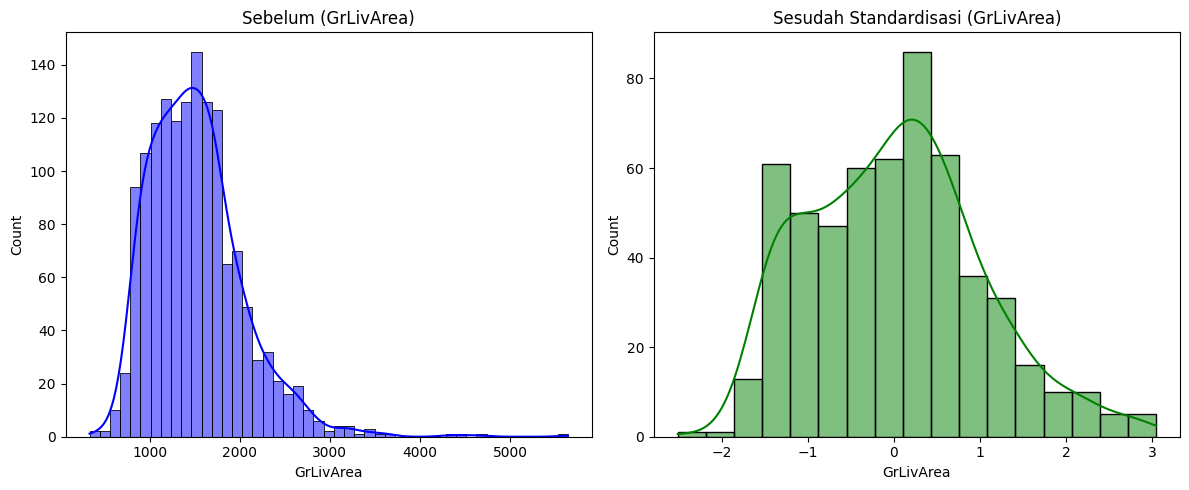

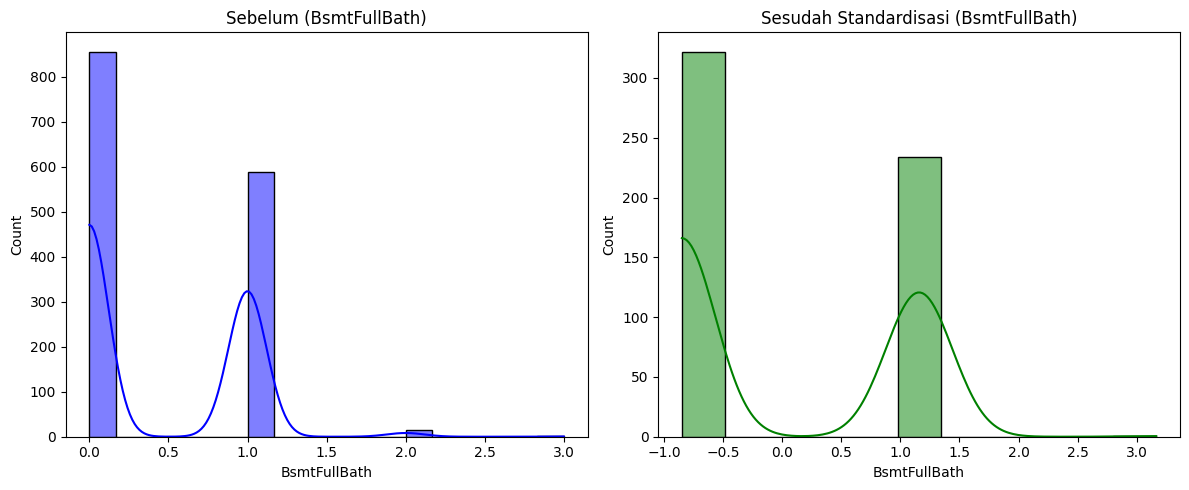

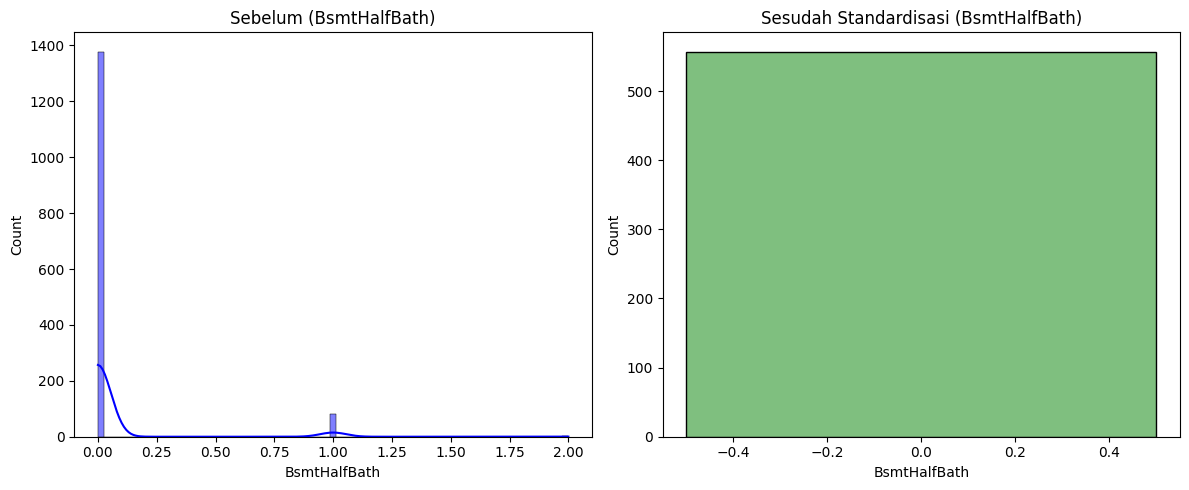

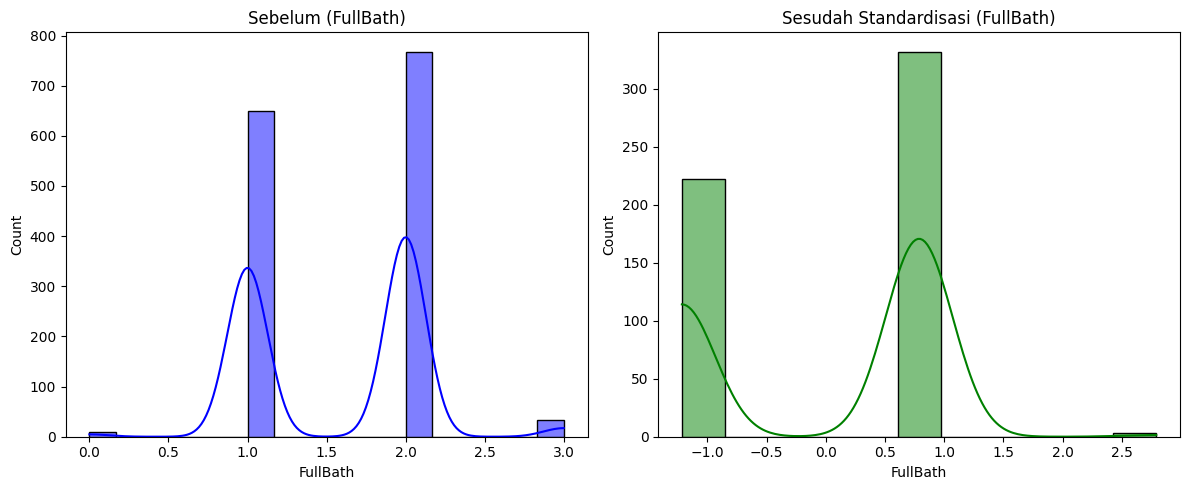

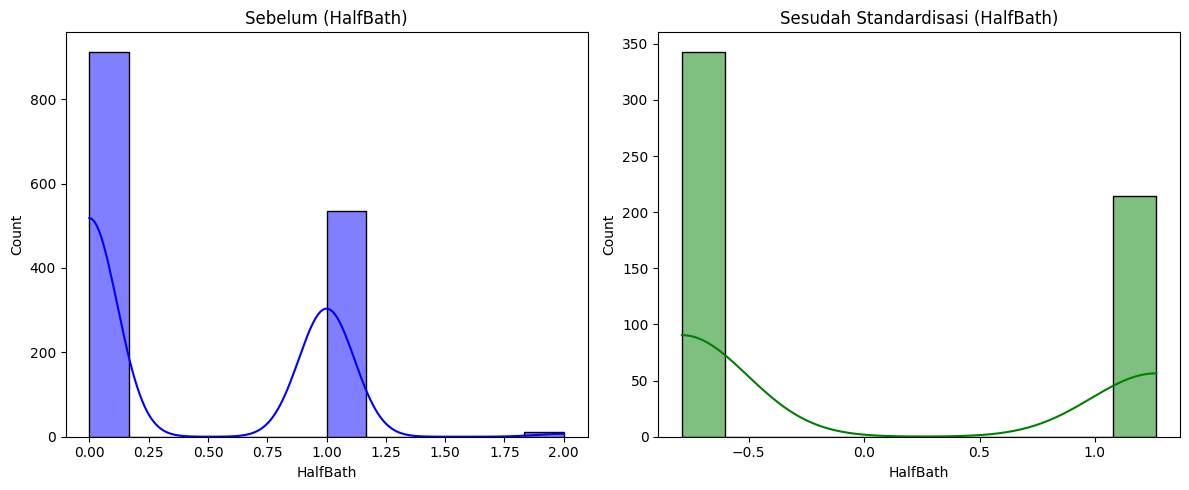

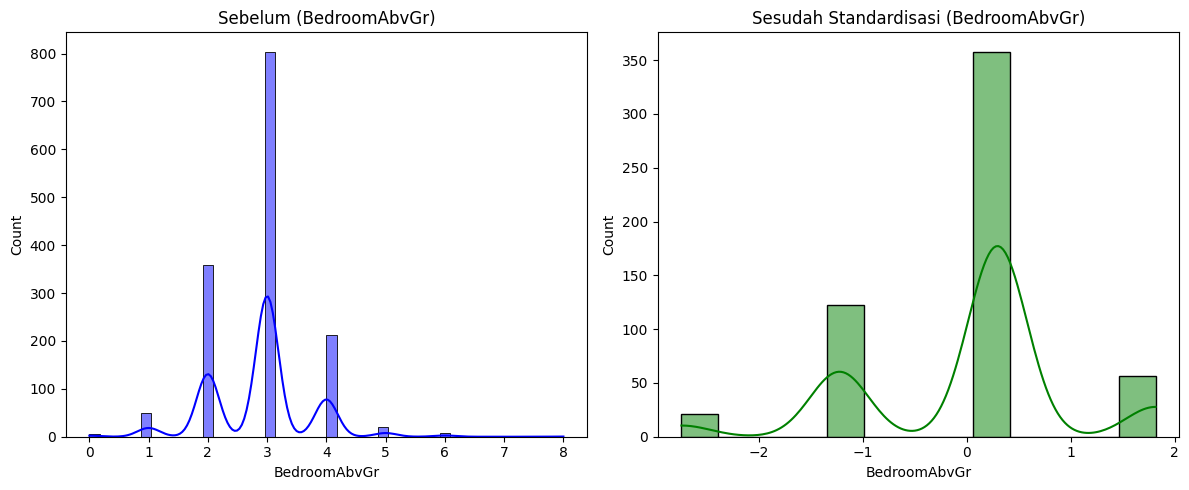

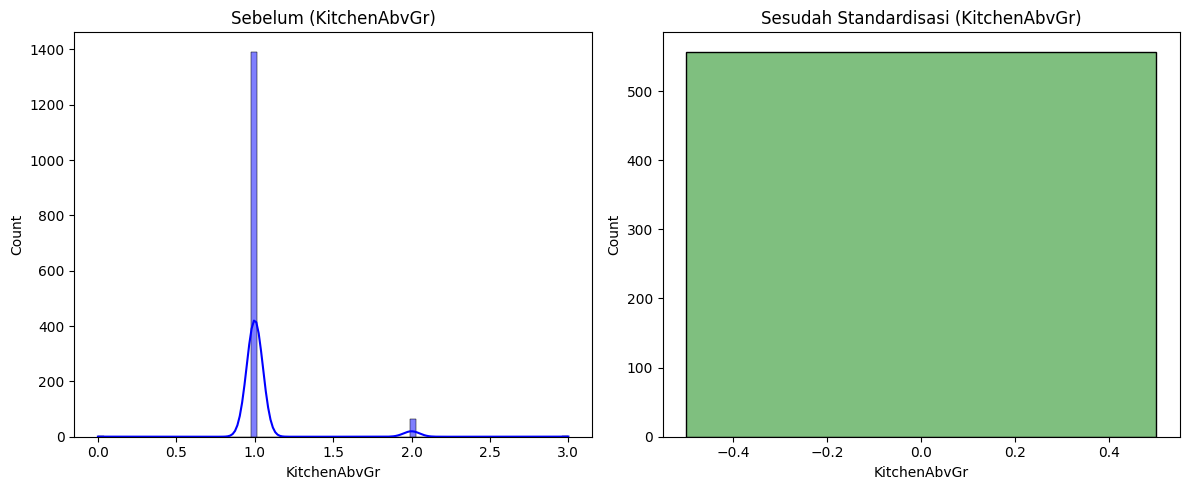

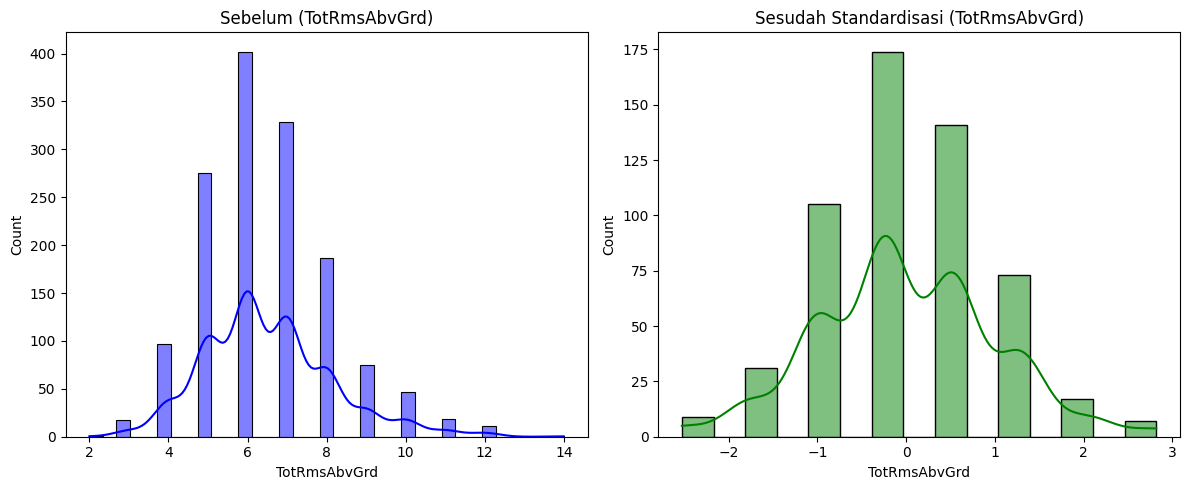

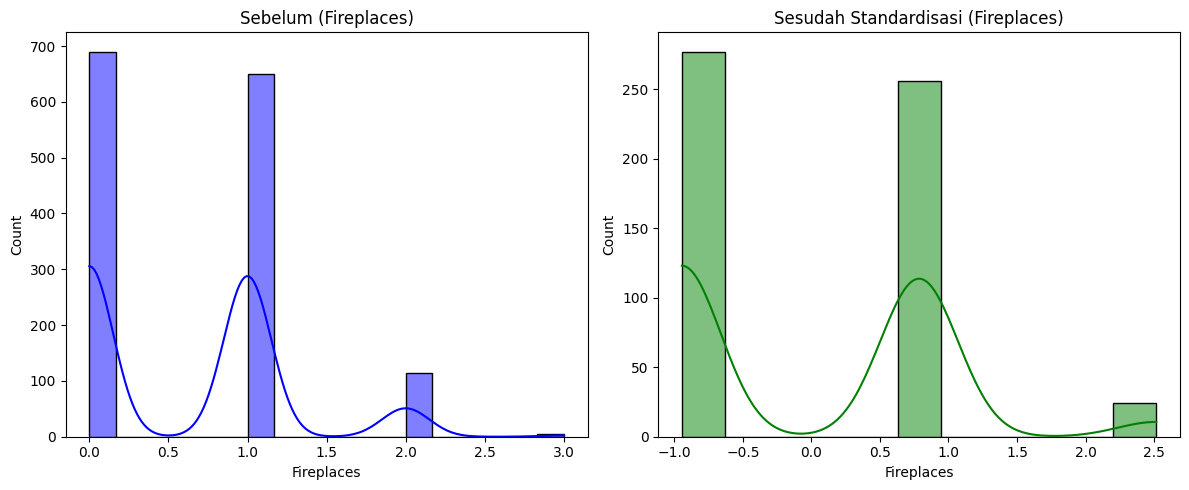

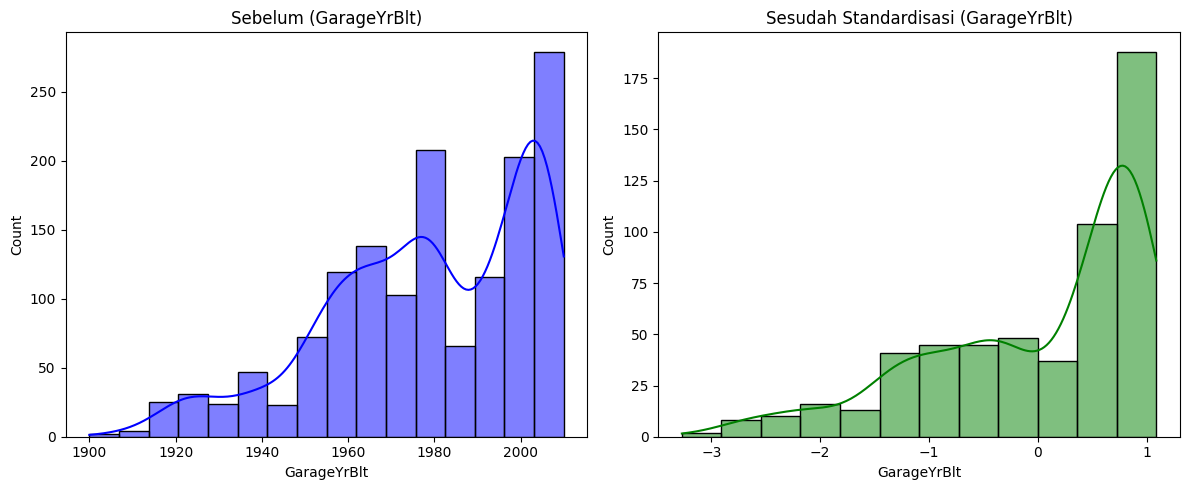

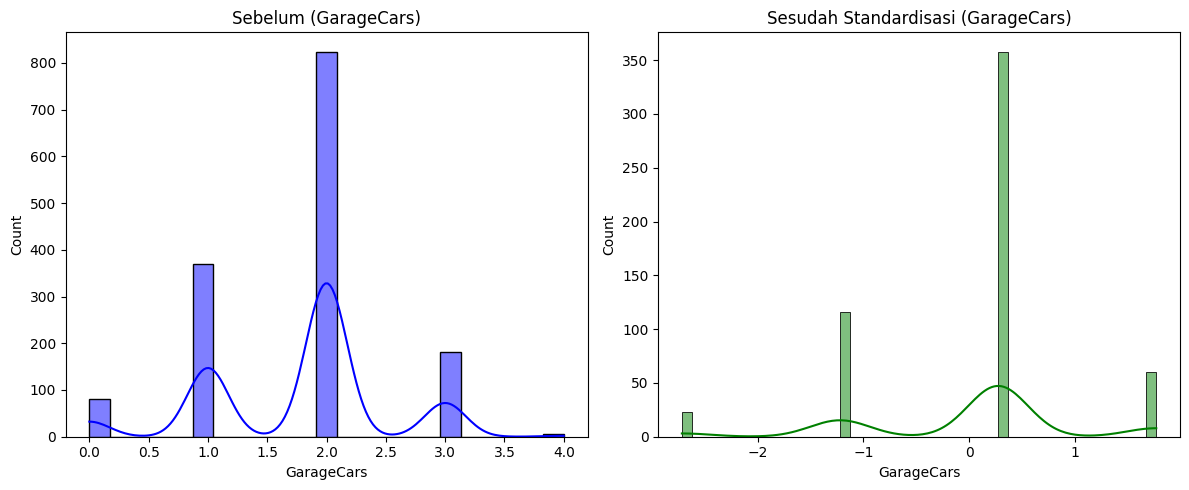

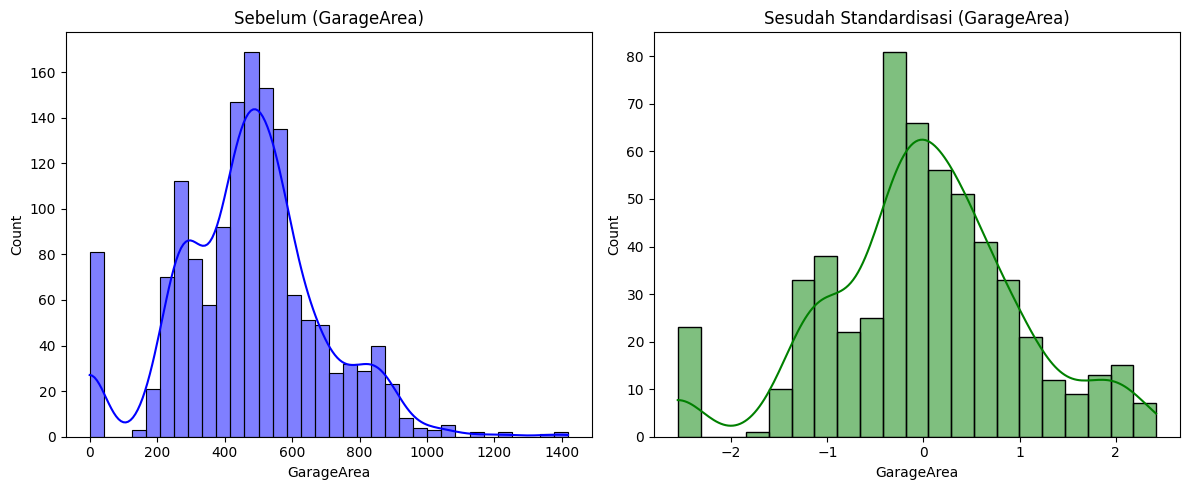

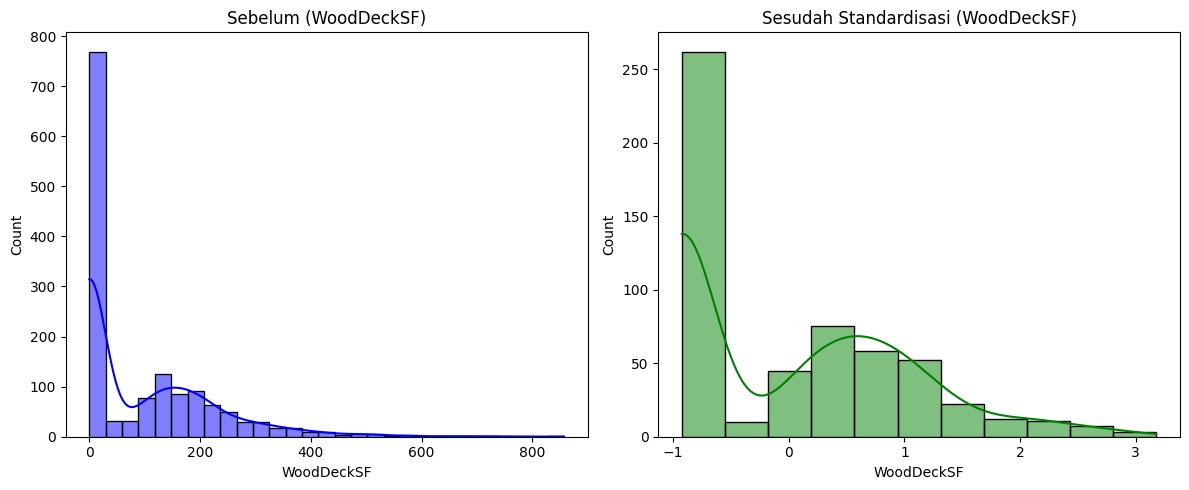

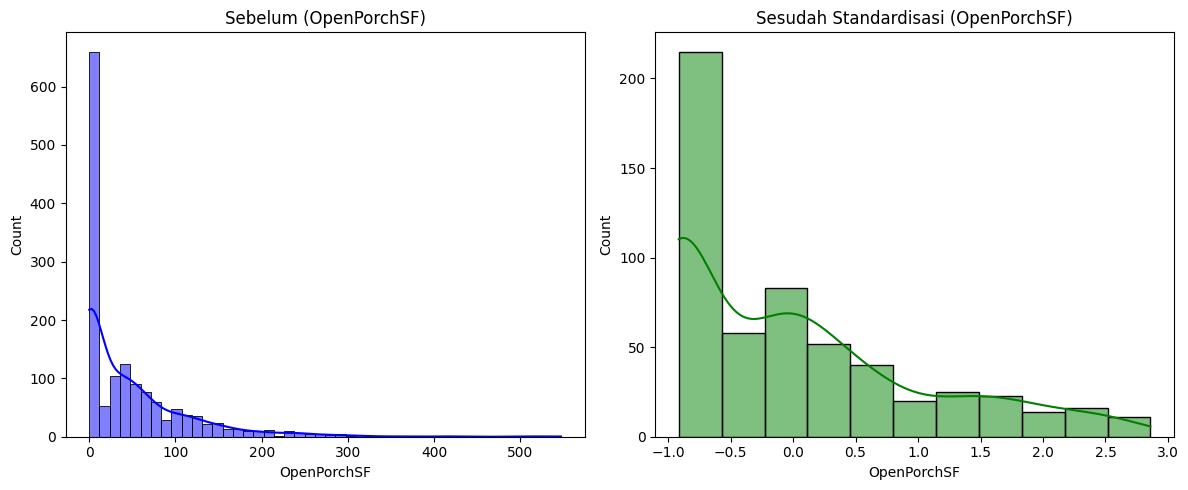

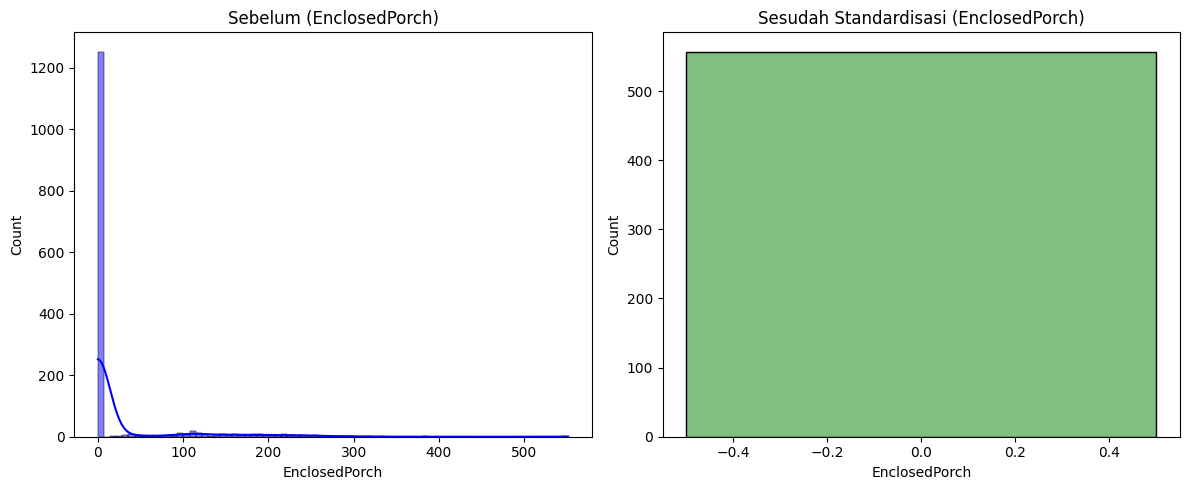

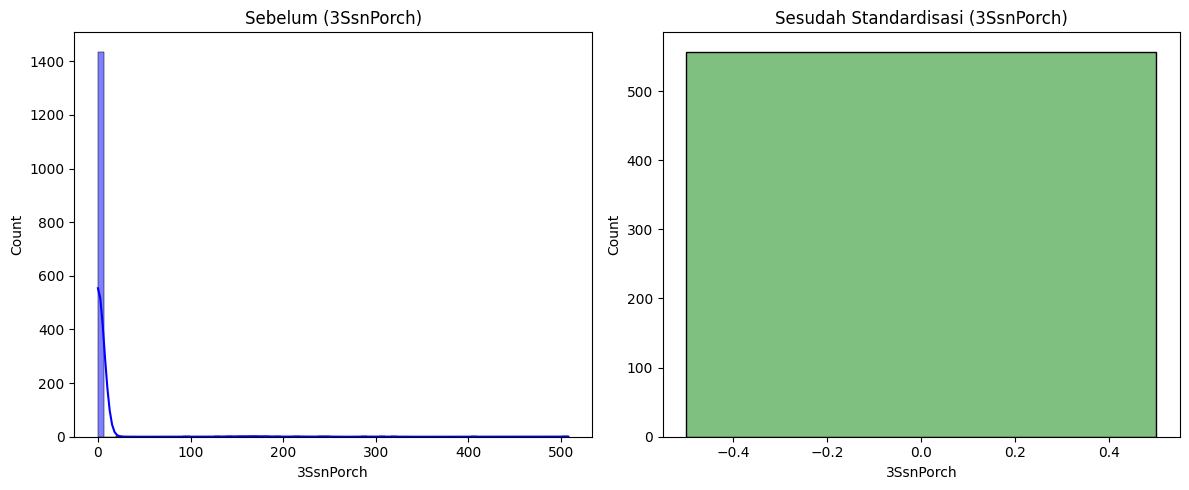

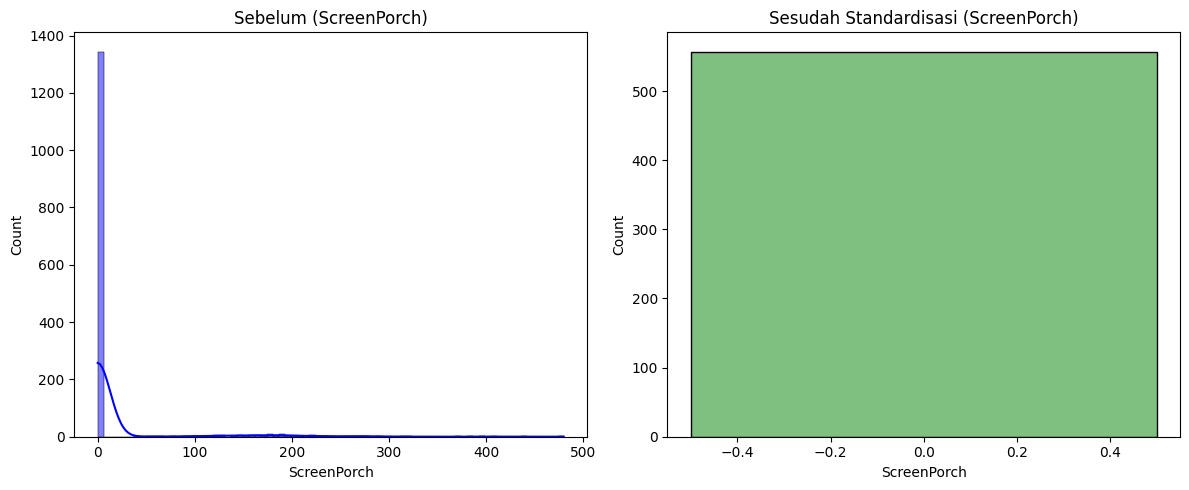

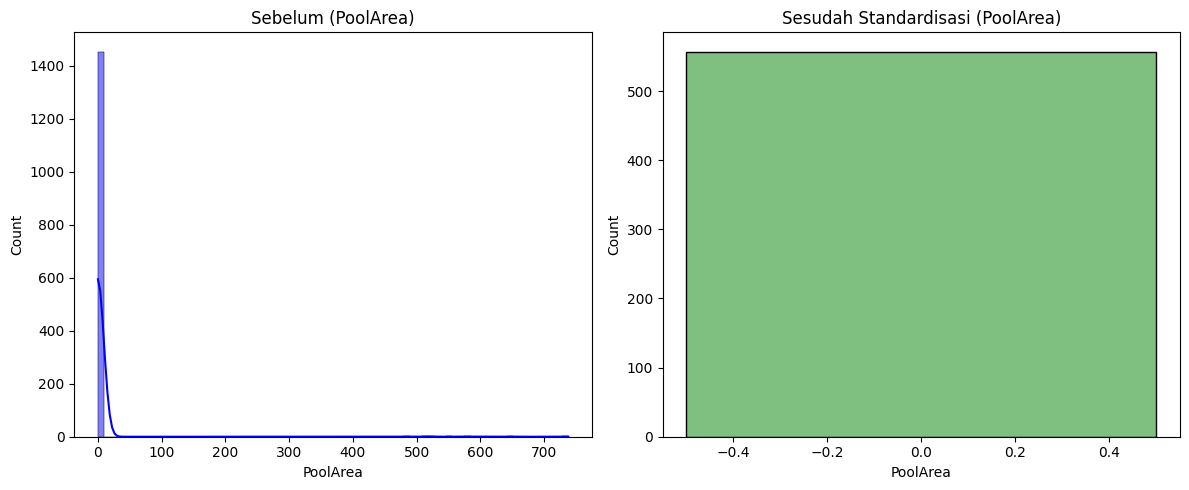

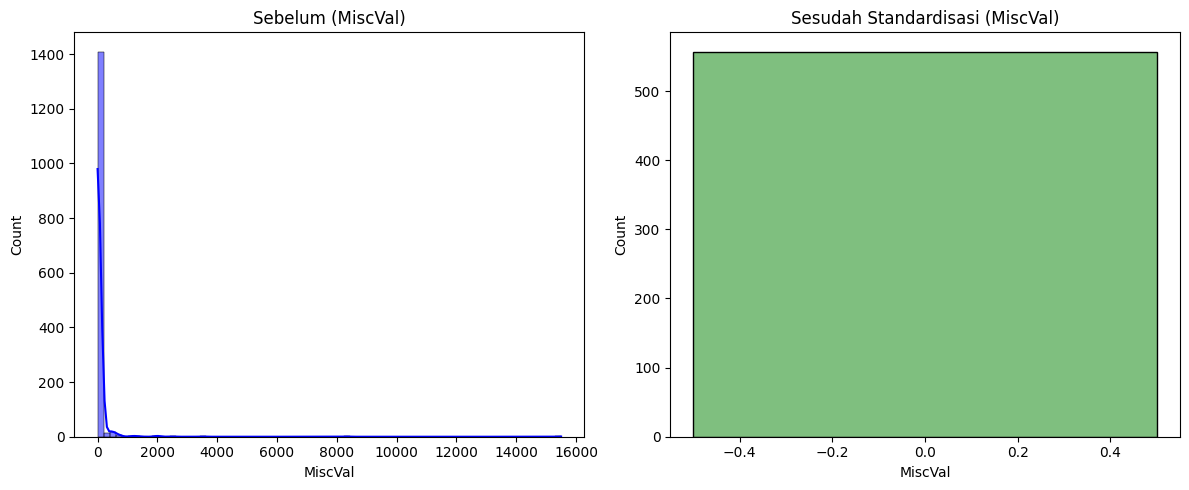

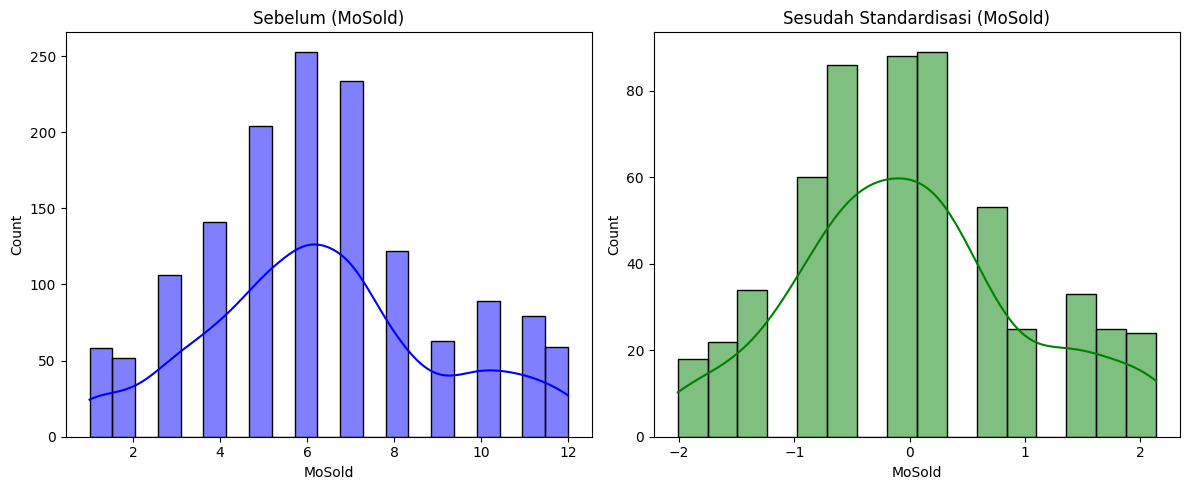

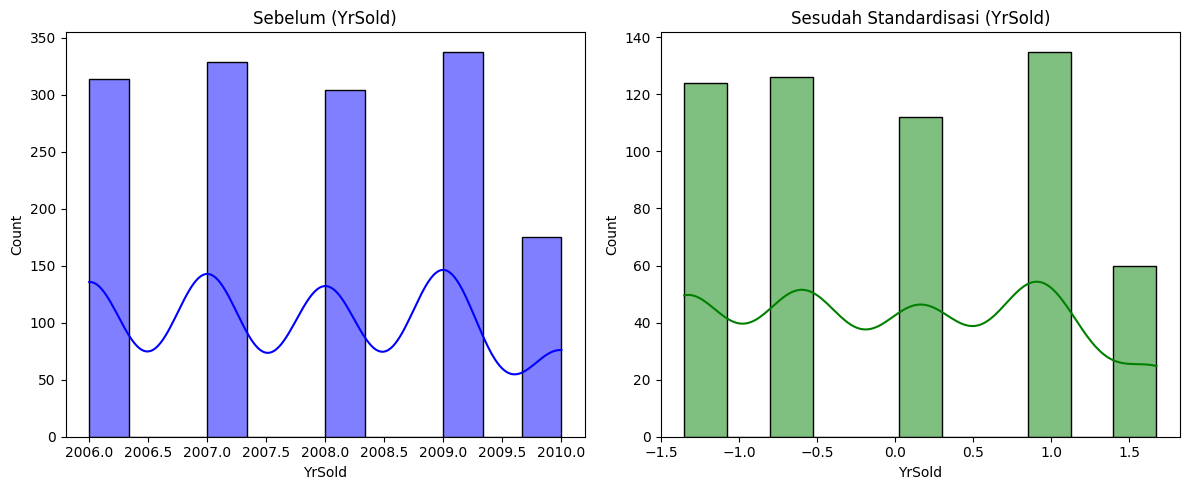

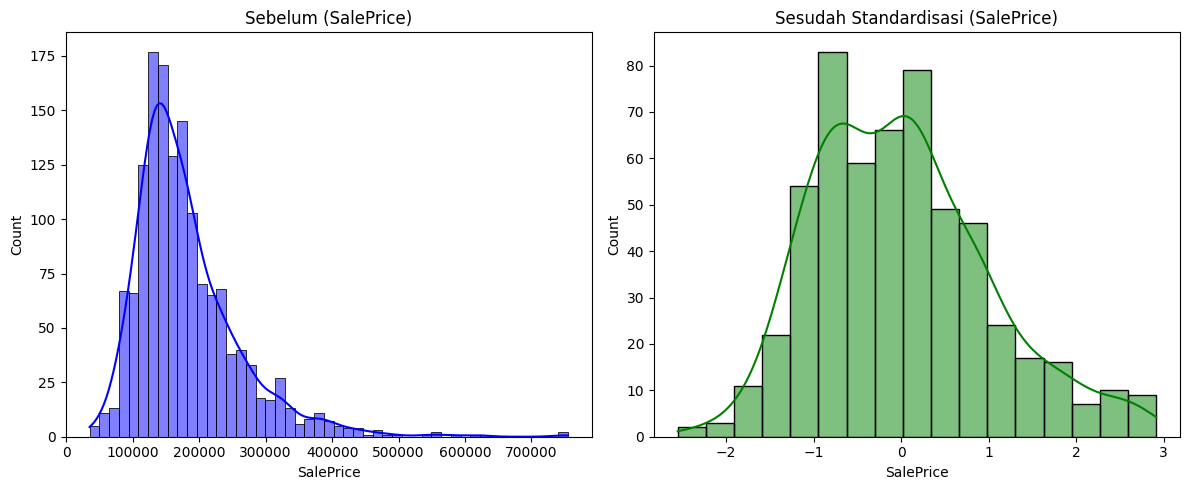

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Memeriksa jumlah nilai yang hilang di setiap kolom
train = pd.read_csv("content/train.csv")
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

missing_values = train.isnull().sum()
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

# Standardisasi fitur numerik
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Kita loop supaya semua kolom numerik tergambar otomatis
for feature in numeric_features:
    plt.figure(figsize=(12, 5))

    # Gambar Kiri: Data Asli (ambil dari variabel 'train')
    # Ini data sebelum kena hapus outlier dan sebelum di-standarisasi
    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde=True, color='blue')
    plt.title(f"Sebelum ({feature})")

    # Gambar Kanan: Data Setelah Standardisasi (ambil dari variabel 'df')
    # Perhatikan kita pakai 'df', bukan 'train', karena hasil scale ada di 'df'
    plt.subplot(1, 2, 2)
    sns.histplot(df[feature], kde=True, color='green')
    plt.title(f"Sesudah Standardisasi ({feature})")

    plt.tight_layout()
    plt.show()